### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar datos locales
tienda1 = pd.read_csv('base-de-datos-challenge1-latam/tienda_1 .csv')
tienda2 = pd.read_csv('base-de-datos-challenge1-latam/tienda_2.csv')
tienda3 = pd.read_csv('base-de-datos-challenge1-latam/tienda_3.csv')
tienda4 = pd.read_csv('base-de-datos-challenge1-latam/tienda_4.csv')

# Combinar todos los datos en un solo DataFrame
todos_datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

print("Datos cargados exitosamente!")
print(f"Total de registros: {len(todos_datos)}")
print("\nPrimeras 5 filas:")
todos_datos.head()

Datos cargados exitosamente!
Total de registros: 9435

Primeras 5 filas:


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# 1. Análisis de facturación

# Explorar la estructura de los datos
print("Información general del dataset:")
print(todos_datos.info())
print("\nColumnas disponibles:")
print(todos_datos.columns.tolist())
print("\nPrimeras 5 filas:")
todos_datos.head()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 884.7+ KB
None

Columnas disponibles:
['Producto', 'Categoría de

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [3]:
# Análisis de facturación
print("=== ANÁLISIS DE FACTURACIÓN ===\n")

# Estadísticas básicas de precios
print("1. Estadísticas de precios:")
print(f"   • Facturación total: ${todos_datos['Precio'].sum():,.2f}")
print(f"   • Precio promedio: ${todos_datos['Precio'].mean():.2f}")
print(f"   • Precio mediano: ${todos_datos['Precio'].median():.2f}")
print(f"   • Precio mínimo: ${todos_datos['Precio'].min():.2f}")
print(f"   • Precio máximo: ${todos_datos['Precio'].max():.2f}")
print(f"   • Desviación estándar: ${todos_datos['Precio'].std():.2f}")

# Análisis por lugar de compra (tiendas)
print("\n2. Facturación por tienda:")
facturacion_por_tienda = todos_datos.groupby('Lugar de Compra')['Precio'].agg(['sum', 'mean', 'count']).round(2)
facturacion_por_tienda.columns = ['Facturación Total', 'Precio Promedio', 'Número de Ventas']
facturacion_por_tienda = facturacion_por_tienda.sort_values('Facturación Total', ascending=False)
print(facturacion_por_tienda)

=== ANÁLISIS DE FACTURACIÓN ===

1. Estadísticas de precios:
   • Facturación total: $4,403,619,200.00
   • Precio promedio: $466732.29
   • Precio mediano: $221500.00
   • Precio mínimo: $7600.00
   • Precio máximo: $2977000.00
   • Desviación estándar: $590320.68

2. Facturación por tienda:
                 Facturación Total  Precio Promedio  Número de Ventas
Lugar de Compra                                                      
Bogotá                1.814858e+09        460273.47              3943
Medellín              1.096669e+09        473927.92              2314
Cali                  5.065261e+08        503005.06              1007
Pereira               2.259273e+08        436996.71               517
Barranquilla          1.320405e+08        425937.10               310
Cartagena             1.023767e+08        423044.21               242
Cúcuta                9.936910e+07        534242.47               186
Bucaramanga           9.057330e+07        500404.97               181
Riohac

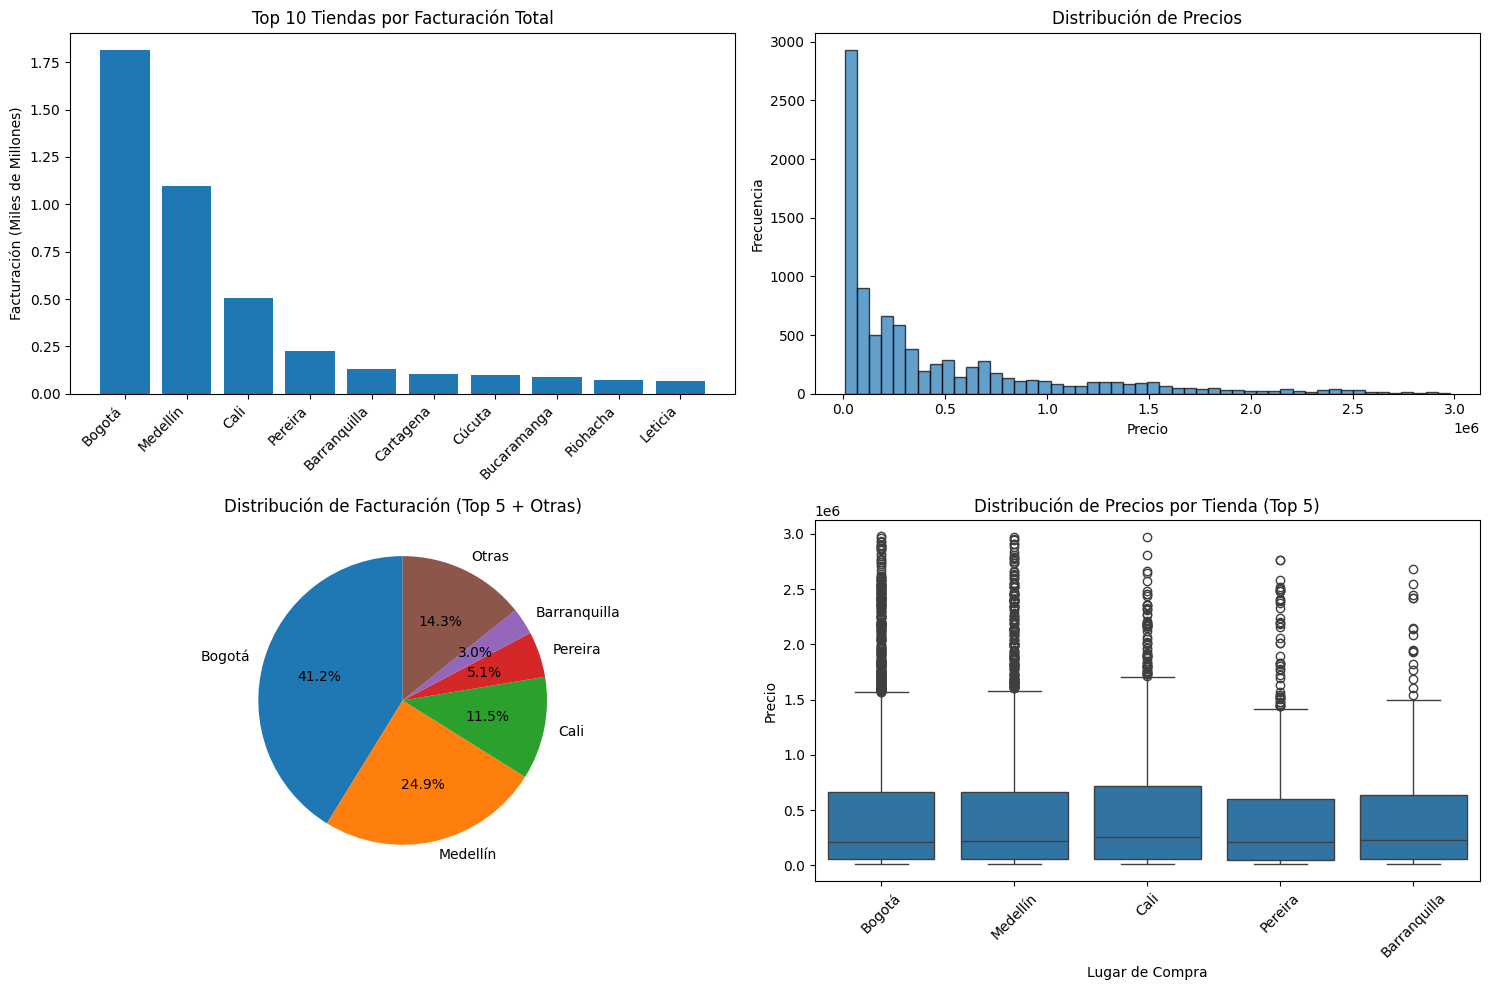

In [4]:
# Visualización de facturación
plt.figure(figsize=(15, 10))

# Gráfico de barras de facturación por tienda
plt.subplot(2, 2, 1)
top_10_tiendas = facturacion_por_tienda.head(10)
plt.bar(range(len(top_10_tiendas)), top_10_tiendas['Facturación Total'] / 1e9)
plt.xticks(range(len(top_10_tiendas)), top_10_tiendas.index, rotation=45, ha='right')
plt.ylabel('Facturación (Miles de Millones)')
plt.title('Top 10 Tiendas por Facturación Total')
plt.tight_layout()

# Histograma de distribución de precios
plt.subplot(2, 2, 2)
plt.hist(todos_datos['Precio'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')

# Gráfico de pastel de facturación por tienda (top 5)
plt.subplot(2, 2, 3)
top_5 = facturacion_por_tienda.head(5)
otros = facturacion_por_tienda.iloc[5:]['Facturación Total'].sum()
valores = list(top_5['Facturación Total']) + [otros]
etiquetas = list(top_5.index) + ['Otras']
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Facturación (Top 5 + Otras)')

# Box plot de precios por tienda (top 5)
plt.subplot(2, 2, 4)
top_5_ciudades = facturacion_por_tienda.head(5).index
datos_top5 = todos_datos[todos_datos['Lugar de Compra'].isin(top_5_ciudades)]
sns.boxplot(data=datos_top5, x='Lugar de Compra', y='Precio')
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Tienda (Top 5)')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [5]:
# 2. Ventas por categoría
print("=== ANÁLISIS DE VENTAS POR CATEGORÍA ===\n")

# Análisis por categoría de producto
ventas_por_categoria = todos_datos.groupby('Categoría del Producto').agg({
    'Precio': ['sum', 'mean', 'count'],
    'Calificación': 'mean'
}).round(2)

# Simplificar nombres de columnas
ventas_por_categoria.columns = ['Facturación Total', 'Precio Promedio', 'Número de Ventas', 'Calificación Promedio']
ventas_por_categoria = ventas_por_categoria.sort_values('Facturación Total', ascending=False)

print("1. Ventas por categoría:")
print(ventas_por_categoria)

print(f"\n2. Categorías disponibles ({len(ventas_por_categoria)} total):")
for i, categoria in enumerate(ventas_por_categoria.index, 1):
    print(f"   {i}. {categoria}")

# Top 5 categorías por facturación
print(f"\n3. Top 5 categorías por facturación:")
top_5_categorias = ventas_por_categoria.head(5)
for i, (categoria, datos) in enumerate(top_5_categorias.iterrows(), 1):
    print(f"   {i}. {categoria}: ${datos['Facturación Total']:,.0f} ({datos['Número de Ventas']} ventas)")

=== ANÁLISIS DE VENTAS POR CATEGORÍA ===

1. Ventas por categoría:
                         Facturación Total  Precio Promedio  Número de Ventas  \
Categoría del Producto                                                          
Electrónicos                  1.660576e+09        937119.92              1772   
Electrodomésticos             1.324751e+09       1152960.05              1149   
Muebles                       7.576610e+08        401729.06              1886   
Instrumentos musicales        3.487726e+08        463177.42               753   
Deportes y diversión          1.429777e+08        128461.55              1113   
Juguetes                      7.360440e+07         57057.67              1290   
Artículos para el hogar       5.757980e+07         78876.44               730   
Libros                        3.769610e+07         50803.37               742   

                         Calificación Promedio  
Categoría del Producto                          
Electrónicos            

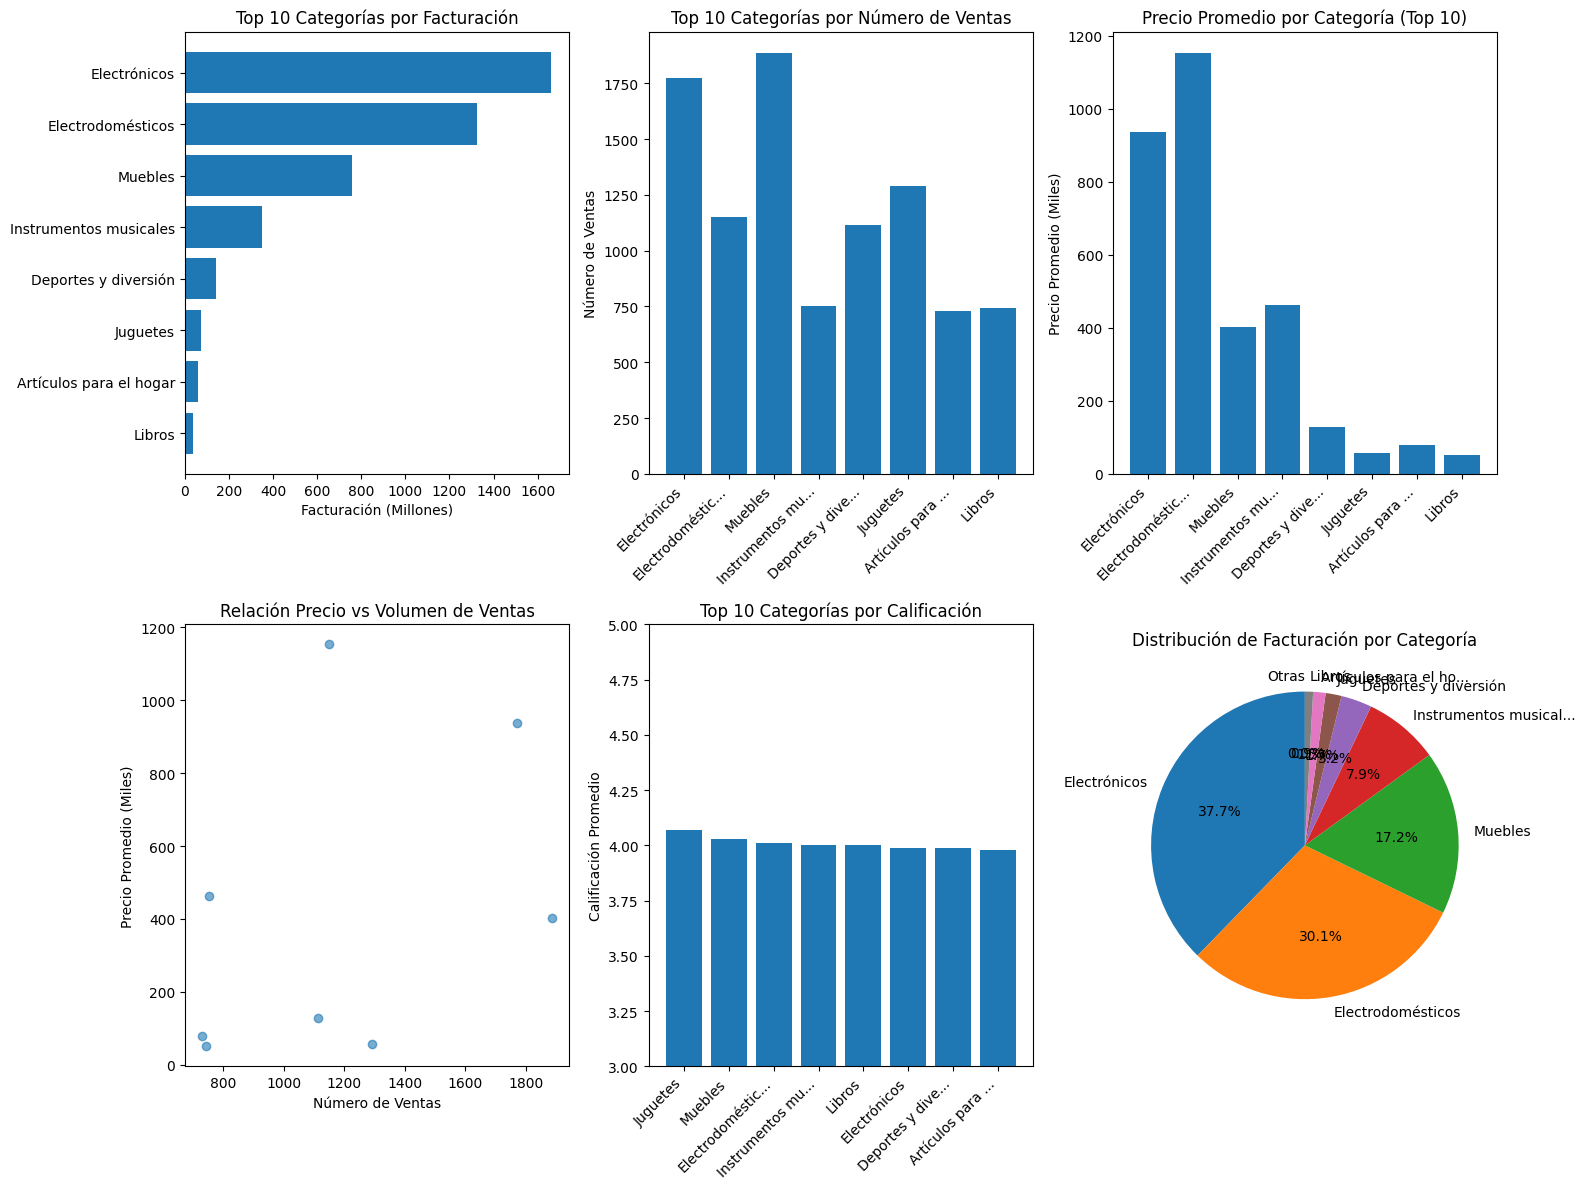

In [6]:
# Visualización de ventas por categoría
plt.figure(figsize=(16, 12))

# Top 10 categorías por facturación
plt.subplot(2, 3, 1)
top_10_cat = ventas_por_categoria.head(10)
plt.barh(range(len(top_10_cat)), top_10_cat['Facturación Total'] / 1e6)
plt.yticks(range(len(top_10_cat)), top_10_cat.index)
plt.xlabel('Facturación (Millones)')
plt.title('Top 10 Categorías por Facturación')
plt.gca().invert_yaxis()

# Número de ventas por categoría (top 10)
plt.subplot(2, 3, 2)
top_10_ventas = ventas_por_categoria.head(10)
plt.bar(range(len(top_10_ventas)), top_10_ventas['Número de Ventas'])
plt.xticks(range(len(top_10_ventas)), [cat[:15] + '...' if len(cat) > 15 else cat for cat in top_10_ventas.index], rotation=45, ha='right')
plt.ylabel('Número de Ventas')
plt.title('Top 10 Categorías por Número de Ventas')

# Precio promedio por categoría (top 10)
plt.subplot(2, 3, 3)
top_10_precio = ventas_por_categoria.head(10)
plt.bar(range(len(top_10_precio)), top_10_precio['Precio Promedio'] / 1000)
plt.xticks(range(len(top_10_precio)), [cat[:15] + '...' if len(cat) > 15 else cat for cat in top_10_precio.index], rotation=45, ha='right')
plt.ylabel('Precio Promedio (Miles)')
plt.title('Precio Promedio por Categoría (Top 10)')

# Gráfico de dispersión: Precio vs Número de ventas
plt.subplot(2, 3, 4)
plt.scatter(ventas_por_categoria['Número de Ventas'], ventas_por_categoria['Precio Promedio'] / 1000, alpha=0.6)
plt.xlabel('Número de Ventas')
plt.ylabel('Precio Promedio (Miles)')
plt.title('Relación Precio vs Volumen de Ventas')

# Calificación promedio por categoría (top 10)
plt.subplot(2, 3, 5)
top_10_calif = ventas_por_categoria.sort_values('Calificación Promedio', ascending=False).head(10)
plt.bar(range(len(top_10_calif)), top_10_calif['Calificación Promedio'])
plt.xticks(range(len(top_10_calif)), [cat[:15] + '...' if len(cat) > 15 else cat for cat in top_10_calif.index], rotation=45, ha='right')
plt.ylabel('Calificación Promedio')
plt.title('Top 10 Categorías por Calificación')
plt.ylim(3, 5)

# Distribución de categorías (pie chart para top 8)
plt.subplot(2, 3, 6)
top_8_cat = ventas_por_categoria.head(8)
otros_cat = ventas_por_categoria.iloc[8:]['Facturación Total'].sum()
valores = list(top_8_cat['Facturación Total']) + [otros_cat]
etiquetas = [cat[:20] + '...' if len(cat) > 20 else cat for cat in top_8_cat.index] + ['Otras']
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Facturación por Categoría')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [7]:
# 3. Calificación promedio de la tienda
print("=== ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA ===\n")

# Análisis de calificaciones por tienda
calificaciones_tienda = todos_datos.groupby('Lugar de Compra').agg({
    'Calificación': ['mean', 'std', 'count', 'min', 'max']
}).round(2)

# Simplificar nombres de columnas
calificaciones_tienda.columns = ['Calificación Promedio', 'Desviación Estándar', 'Número de Calificaciones', 'Calificación Mínima', 'Calificación Máxima']
calificaciones_tienda = calificaciones_tienda.sort_values('Calificación Promedio', ascending=False)

print("1. Calificaciones por tienda:")
print(calificaciones_tienda)

# Estadísticas generales de calificaciones
print(f"\n2. Estadísticas generales de calificaciones:")
print(f"   • Calificación promedio general: {todos_datos['Calificación'].mean():.2f}")
print(f"   • Calificación mediana: {todos_datos['Calificación'].median():.2f}")
print(f"   • Calificación mínima: {todos_datos['Calificación'].min()}")
print(f"   • Calificación máxima: {todos_datos['Calificación'].max()}")
print(f"   • Desviación estándar: {todos_datos['Calificación'].std():.2f}")

# Top y bottom 5 tiendas por calificación
print(f"\n3. Top 5 tiendas por calificación promedio:")
top_5_calif = calificaciones_tienda.head(5)
for i, (tienda, datos) in enumerate(top_5_calif.iterrows(), 1):
    print(f"   {i}. {tienda}: {datos['Calificación Promedio']:.2f} ({datos['Número de Calificaciones']} evaluaciones)")

print(f"\n4. Bottom 5 tiendas por calificación promedio:")
bottom_5_calif = calificaciones_tienda.tail(5)
for i, (tienda, datos) in enumerate(bottom_5_calif.iterrows(), 1):
    print(f"   {i}. {tienda}: {datos['Calificación Promedio']:.2f} ({datos['Número de Calificaciones']} evaluaciones)")

=== ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA ===

1. Calificaciones por tienda:
                 Calificación Promedio  Desviación Estándar  \
Lugar de Compra                                               
Pasto                             4.15                 1.26   
Bogotá                            4.11                 1.32   
Valledupar                        4.07                 1.21   
Cali                              4.05                 1.36   
Cartagena                         4.02                 1.35   
Pereira                           4.01                 1.42   
Bucaramanga                       3.98                 1.37   
Cúcuta                            3.94                 1.41   
Medellín                          3.93                 1.47   
Leticia                           3.92                 1.42   
Riohacha                          3.90                 1.53   
Soacha                            3.89                 1.52   
Villavicencio                     

C:\Users\DELL\AppData\Local\Temp\ipykernel_4884\481029904.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_para_boxplot, labels=etiquetas_tiendas)


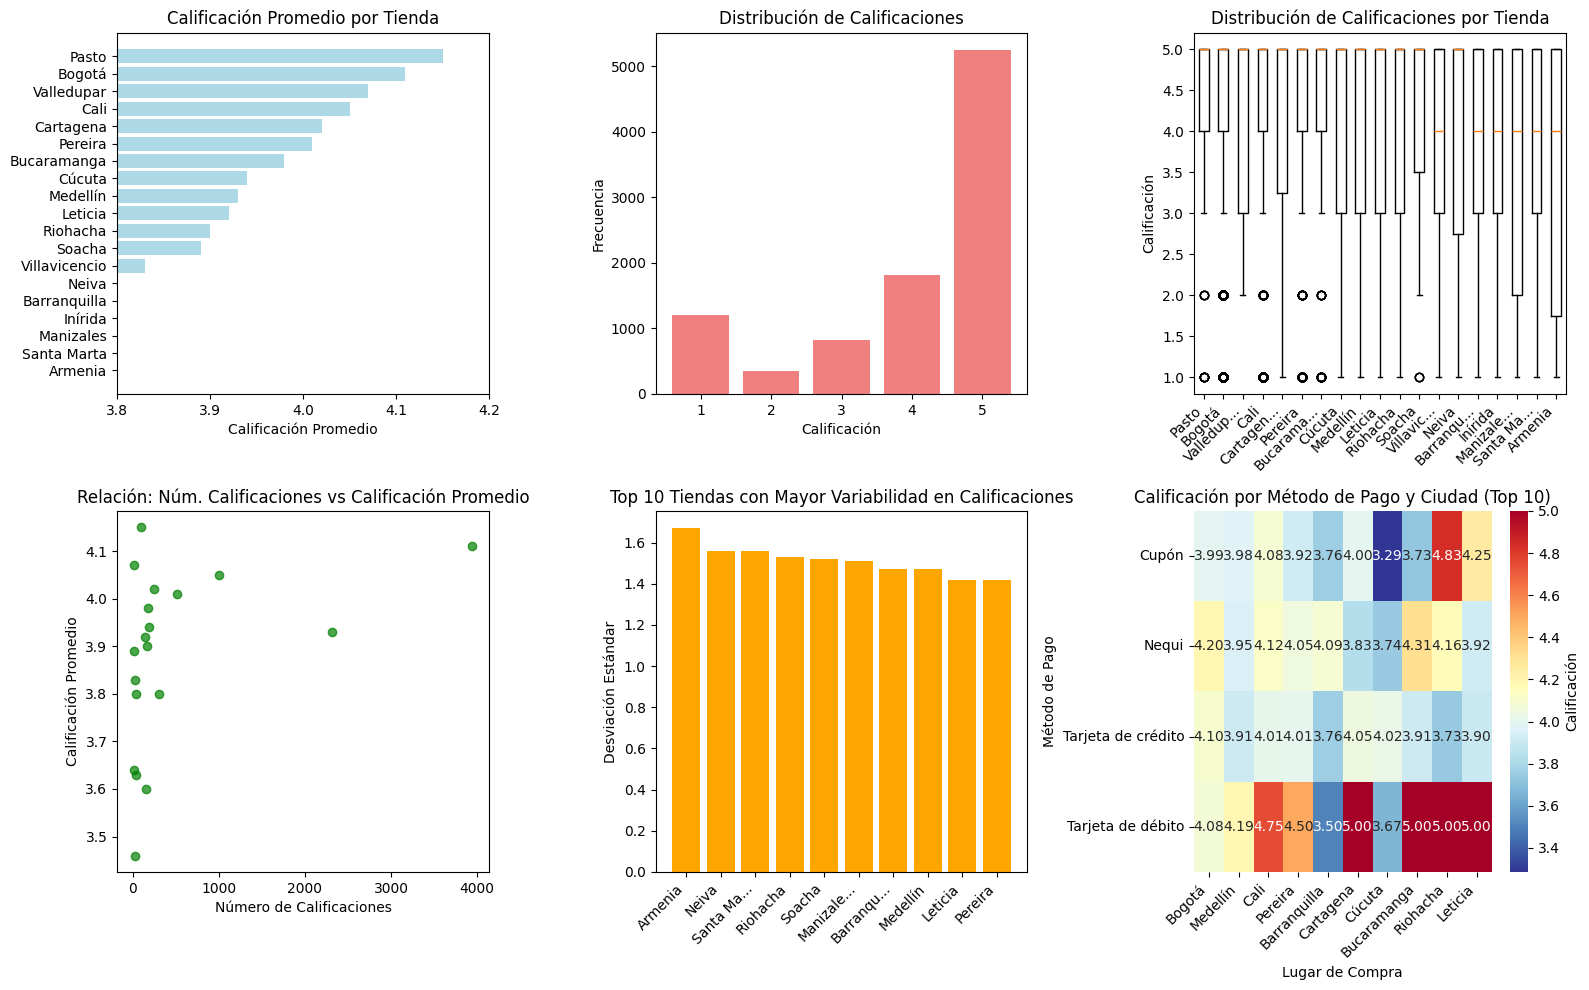

In [8]:
# Visualización de calificaciones
plt.figure(figsize=(16, 10))

# Calificación promedio por tienda
plt.subplot(2, 3, 1)
plt.barh(range(len(calificaciones_tienda)), calificaciones_tienda['Calificación Promedio'], color='lightblue')
plt.yticks(range(len(calificaciones_tienda)), calificaciones_tienda.index)
plt.xlabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')
plt.xlim(3.8, 4.2)
plt.gca().invert_yaxis()

# Distribución de calificaciones general
plt.subplot(2, 3, 2)
calificaciones_counts = todos_datos['Calificación'].value_counts().sort_index()
plt.bar(calificaciones_counts.index, calificaciones_counts.values, color='lightcoral')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones')
plt.xticks([1, 2, 3, 4, 5])

# Box plot de calificaciones por tienda (todas las tiendas)
plt.subplot(2, 3, 3)
datos_para_boxplot = []
etiquetas_tiendas = []
for tienda in calificaciones_tienda.index:
    datos_tienda = todos_datos[todos_datos['Lugar de Compra'] == tienda]['Calificación']
    datos_para_boxplot.append(datos_tienda)
    etiquetas_tiendas.append(tienda[:8] + '...' if len(tienda) > 8 else tienda)

plt.boxplot(datos_para_boxplot, labels=etiquetas_tiendas)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Calificación')
plt.title('Distribución de Calificaciones por Tienda')

# Relación entre número de calificaciones y calificación promedio
plt.subplot(2, 3, 4)
plt.scatter(calificaciones_tienda['Número de Calificaciones'], 
           calificaciones_tienda['Calificación Promedio'], alpha=0.7, color='green')
plt.xlabel('Número de Calificaciones')
plt.ylabel('Calificación Promedio')
plt.title('Relación: Núm. Calificaciones vs Calificación Promedio')

# Desviación estándar por tienda
plt.subplot(2, 3, 5)
top_10_desv = calificaciones_tienda.sort_values('Desviación Estándar', ascending=False).head(10)
plt.bar(range(len(top_10_desv)), top_10_desv['Desviación Estándar'], color='orange')
plt.xticks(range(len(top_10_desv)), [t[:8] + '...' if len(t) > 8 else t for t in top_10_desv.index], rotation=45, ha='right')
plt.ylabel('Desviación Estándar')
plt.title('Top 10 Tiendas con Mayor Variabilidad en Calificaciones')

# Heatmap de calificaciones por método de pago y lugar
plt.subplot(2, 3, 6)
pivot_calif = todos_datos.pivot_table(values='Calificación', 
                                     index='Método de pago', 
                                     columns='Lugar de Compra', 
                                     aggfunc='mean')
# Seleccionar solo las top 10 ciudades por facturación para el heatmap
top_ciudades = facturacion_por_tienda.head(10).index
pivot_calif_top = pivot_calif[top_ciudades]
sns.heatmap(pivot_calif_top, annot=True, cmap='RdYlBu_r', fmt='.2f', cbar_kws={'label': 'Calificación'})
plt.title('Calificación por Método de Pago y Ciudad (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Método de Pago')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [9]:
# 4. Productos más y menos vendidos
print("=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===\n")

# Análisis por producto individual
productos_vendidos = todos_datos.groupby('Producto').agg({
    'Precio': ['sum', 'mean', 'count'],
    'Calificación': 'mean'
}).round(2)

# Simplificar nombres de columnas
productos_vendidos.columns = ['Facturación Total', 'Precio Promedio', 'Cantidad Vendida', 'Calificación Promedio']
productos_vendidos = productos_vendidos.sort_values('Cantidad Vendida', ascending=False)

print(f"1. Total de productos únicos: {len(productos_vendidos)}")

print(f"\n2. Top 15 productos más vendidos:")
top_15_productos = productos_vendidos.head(15)
for i, (producto, datos) in enumerate(top_15_productos.iterrows(), 1):
    print(f"   {i:2}. {producto[:50]:<50} - {datos['Cantidad Vendida']} unidades (${datos['Facturación Total']:,.0f})")

print(f"\n3. Top 15 productos menos vendidos:")
bottom_15_productos = productos_vendidos.tail(15).sort_values('Cantidad Vendida', ascending=True)
for i, (producto, datos) in enumerate(bottom_15_productos.iterrows(), 1):
    print(f"   {i:2}. {producto[:50]:<50} - {datos['Cantidad Vendida']} unidades (${datos['Facturación Total']:,.0f})")

# Productos por facturación
print(f"\n4. Top 10 productos por facturación:")
top_10_facturacion = productos_vendidos.sort_values('Facturación Total', ascending=False).head(10)
for i, (producto, datos) in enumerate(top_10_facturacion.iterrows(), 1):
    print(f"   {i:2}. {producto[:40]:<40} - ${datos['Facturación Total']:,.0f} ({datos['Cantidad Vendida']} unidades)")

=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===

1. Total de productos únicos: 51

2. Top 15 productos más vendidos:
    1. Mesa de noche                                      - 210.0 unidades ($58,419,500)
    2. Microondas                                         - 206.0 unidades ($115,699,500)
    3. Carrito de control remoto                          - 206.0 unidades ($14,767,700)
    4. Batería                                            - 203.0 unidades ($147,806,300)
    5. Cama king                                          - 201.0 unidades ($135,780,400)
    6. Modelado predictivo                                - 200.0 unidades ($12,616,100)
    7. Secadora de ropa                                   - 200.0 unidades ($210,238,000)
    8. Set de ollas                                       - 200.0 unidades ($30,506,400)
    9. Cama box                                           - 199.0 unidades ($104,097,800)
   10. Bloques de construcción                            - 199.0 unidades

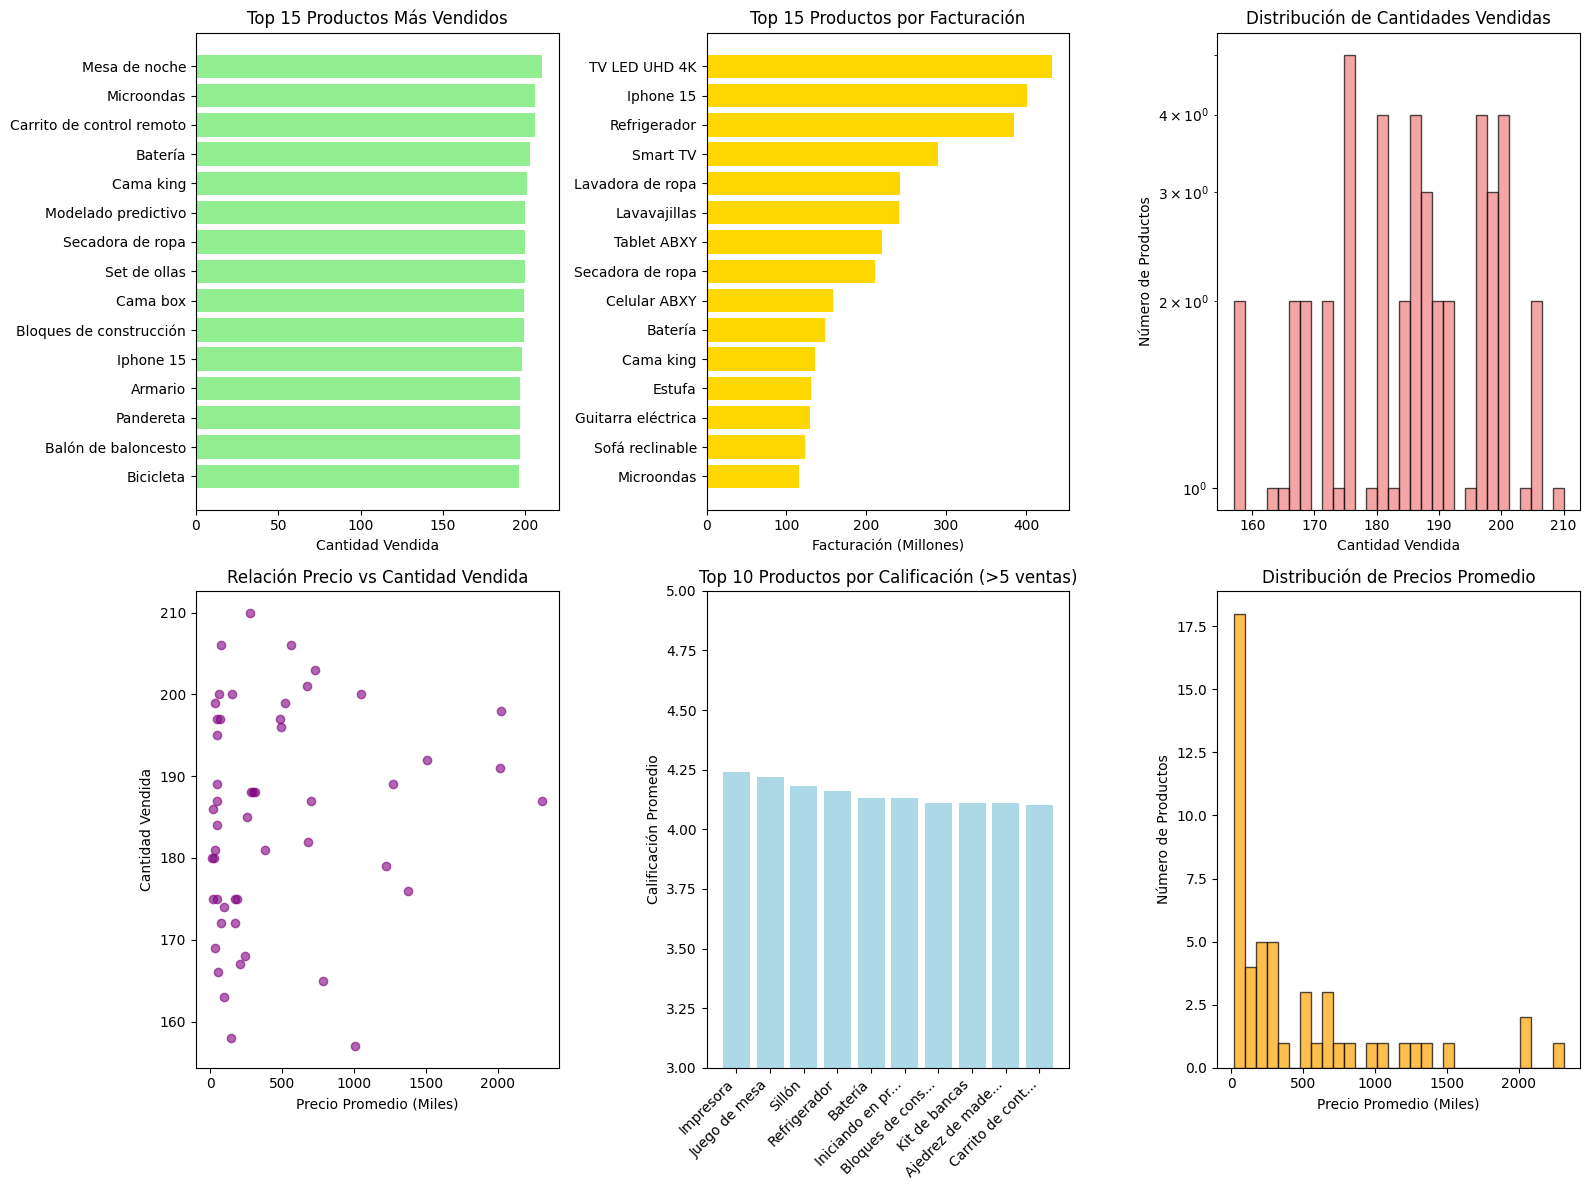


=== ESTADÍSTICAS ADICIONALES DE PRODUCTOS ===
• Producto más vendido: Mesa de noche (210.0 unidades)
• Producto menos vendido: Celular ABXY (157.0 unidades)
• Promedio de ventas por producto: 185.0 unidades
• Mediana de ventas por producto: 187.0 unidades
• Productos con solo 1 venta: 0 (0.0%)
• Productos con más de 10 ventas: 51 (100.0%)


In [10]:
# Visualización de productos más y menos vendidos
plt.figure(figsize=(16, 12))

# Top 15 productos más vendidos
plt.subplot(2, 3, 1)
top_15_productos = productos_vendidos.head(15)
plt.barh(range(len(top_15_productos)), top_15_productos['Cantidad Vendida'], color='lightgreen')
plt.yticks(range(len(top_15_productos)), [p[:30] + '...' if len(p) > 30 else p for p in top_15_productos.index])
plt.xlabel('Cantidad Vendida')
plt.title('Top 15 Productos Más Vendidos')
plt.gca().invert_yaxis()

# Top 15 productos por facturación
plt.subplot(2, 3, 2)
top_15_facturacion = productos_vendidos.sort_values('Facturación Total', ascending=False).head(15)
plt.barh(range(len(top_15_facturacion)), top_15_facturacion['Facturación Total'] / 1e6, color='gold')
plt.yticks(range(len(top_15_facturacion)), [p[:30] + '...' if len(p) > 30 else p for p in top_15_facturacion.index])
plt.xlabel('Facturación (Millones)')
plt.title('Top 15 Productos por Facturación')
plt.gca().invert_yaxis()

# Distribución de cantidad vendida
plt.subplot(2, 3, 3)
plt.hist(productos_vendidos['Cantidad Vendida'], bins=30, alpha=0.7, edgecolor='black', color='lightcoral')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Número de Productos')
plt.title('Distribución de Cantidades Vendidas')
plt.yscale('log')

# Relación precio vs cantidad vendida
plt.subplot(2, 3, 4)
plt.scatter(productos_vendidos['Precio Promedio'] / 1000, productos_vendidos['Cantidad Vendida'], alpha=0.6, color='purple')
plt.xlabel('Precio Promedio (Miles)')
plt.ylabel('Cantidad Vendida')
plt.title('Relación Precio vs Cantidad Vendida')

# Top productos por calificación (solo los que tienen más de 5 ventas)
plt.subplot(2, 3, 5)
productos_con_ventas = productos_vendidos[productos_vendidos['Cantidad Vendida'] >= 5]
top_10_calif_prod = productos_con_ventas.sort_values('Calificación Promedio', ascending=False).head(10)
plt.bar(range(len(top_10_calif_prod)), top_10_calif_prod['Calificación Promedio'], color='lightblue')
plt.xticks(range(len(top_10_calif_prod)), [p[:15] + '...' if len(p) > 15 else p for p in top_10_calif_prod.index], rotation=45, ha='right')
plt.ylabel('Calificación Promedio')
plt.title('Top 10 Productos por Calificación (>5 ventas)')
plt.ylim(3, 5)

# Distribución de precios promedio de productos
plt.subplot(2, 3, 6)
plt.hist(productos_vendidos['Precio Promedio'] / 1000, bins=30, alpha=0.7, edgecolor='black', color='orange')
plt.xlabel('Precio Promedio (Miles)')
plt.ylabel('Número de Productos')
plt.title('Distribución de Precios Promedio')

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print("\n=== ESTADÍSTICAS ADICIONALES DE PRODUCTOS ===")
print(f"• Producto más vendido: {productos_vendidos.iloc[0].name} ({productos_vendidos.iloc[0]['Cantidad Vendida']} unidades)")
print(f"• Producto menos vendido: {productos_vendidos.iloc[-1].name} ({productos_vendidos.iloc[-1]['Cantidad Vendida']} unidades)")
print(f"• Promedio de ventas por producto: {productos_vendidos['Cantidad Vendida'].mean():.1f} unidades")
print(f"• Mediana de ventas por producto: {productos_vendidos['Cantidad Vendida'].median():.1f} unidades")
print(f"• Productos con solo 1 venta: {len(productos_vendidos[productos_vendidos['Cantidad Vendida'] == 1])} ({len(productos_vendidos[productos_vendidos['Cantidad Vendida'] == 1])/len(productos_vendidos)*100:.1f}%)")
print(f"• Productos con más de 10 ventas: {len(productos_vendidos[productos_vendidos['Cantidad Vendida'] > 10])} ({len(productos_vendidos[productos_vendidos['Cantidad Vendida'] > 10])/len(productos_vendidos)*100:.1f}%)")

# 5. Envío promedio por tienda

In [11]:
# 5. Envío promedio por tienda
print("=== ANÁLISIS DE COSTOS DE ENVÍO POR TIENDA ===\n")

# Análisis de costos de envío por tienda
envios_por_tienda = todos_datos.groupby('Lugar de Compra').agg({
    'Costo de envío': ['mean', 'std', 'min', 'max', 'sum'],
    'Precio': 'count'
}).round(2)

# Simplificar nombres de columnas
envios_por_tienda.columns = ['Envío Promedio', 'Desviación Estándar', 'Envío Mínimo', 'Envío Máximo', 'Costo Total Envíos', 'Número de Envíos']
envios_por_tienda = envios_por_tienda.sort_values('Envío Promedio', ascending=False)

print("1. Costos de envío por tienda:")
print(envios_por_tienda)

# Estadísticas generales de envíos
print(f"\n2. Estadísticas generales de envíos:")
print(f"   • Costo de envío promedio general: ${todos_datos['Costo de envío'].mean():.2f}")
print(f"   • Costo de envío mediano: ${todos_datos['Costo de envío'].median():.2f}")
print(f"   • Costo de envío mínimo: ${todos_datos['Costo de envío'].min():.2f}")
print(f"   • Costo de envío máximo: ${todos_datos['Costo de envío'].max():.2f}")
print(f"   • Total gastado en envíos: ${todos_datos['Costo de envío'].sum():,.2f}")
print(f"   • Desviación estándar: ${todos_datos['Costo de envío'].std():.2f}")

# Porcentaje del costo de envío respecto al precio del producto
todos_datos['Porcentaje_Envio'] = (todos_datos['Costo de envío'] / todos_datos['Precio'] * 100).round(2)

print(f"\n3. Impacto del envío en el precio total:")
print(f"   • Porcentaje promedio de envío respecto al precio: {todos_datos['Porcentaje_Envio'].mean():.2f}%")
print(f"   • Porcentaje mediano de envío respecto al precio: {todos_datos['Porcentaje_Envio'].median():.2f}%")

# Top y bottom tiendas por costo de envío
print(f"\n4. Top 5 tiendas con envío más caro:")
top_5_envio = envios_por_tienda.head(5)
for i, (tienda, datos) in enumerate(top_5_envio.iterrows(), 1):
    print(f"   {i}. {tienda}: ${datos['Envío Promedio']:.2f} ({datos['Número de Envíos']} envíos)")

print(f"\n5. Top 5 tiendas con envío más barato:")
bottom_5_envio = envios_por_tienda.tail(5)
for i, (tienda, datos) in enumerate(bottom_5_envio.iterrows(), 1):
    print(f"   {i}. {tienda}: ${datos['Envío Promedio']:.2f} ({datos['Número de Envíos']} envíos)")

=== ANÁLISIS DE COSTOS DE ENVÍO POR TIENDA ===

1. Costos de envío por tienda:
                 Envío Promedio  Desviación Estándar  Envío Mínimo  \
Lugar de Compra                                                      
Soacha                 34768.42             36148.84         900.0   
Inírida                30557.14             37358.82           0.0   
Cúcuta                 28597.31             36249.96           0.0   
Pasto                  27801.06             32961.48           0.0   
Neiva                  27710.00             36173.37           0.0   
Bucaramanga            26790.06             33507.63           0.0   
Cali                   26726.81             31769.69           0.0   
Leticia                25317.61             30561.62           0.0   
Medellín               25282.02             32092.56           0.0   
Villavicencio          25100.00             27609.72           0.0   
Manizales              24948.78             29870.66           0.0   
Bogotá     

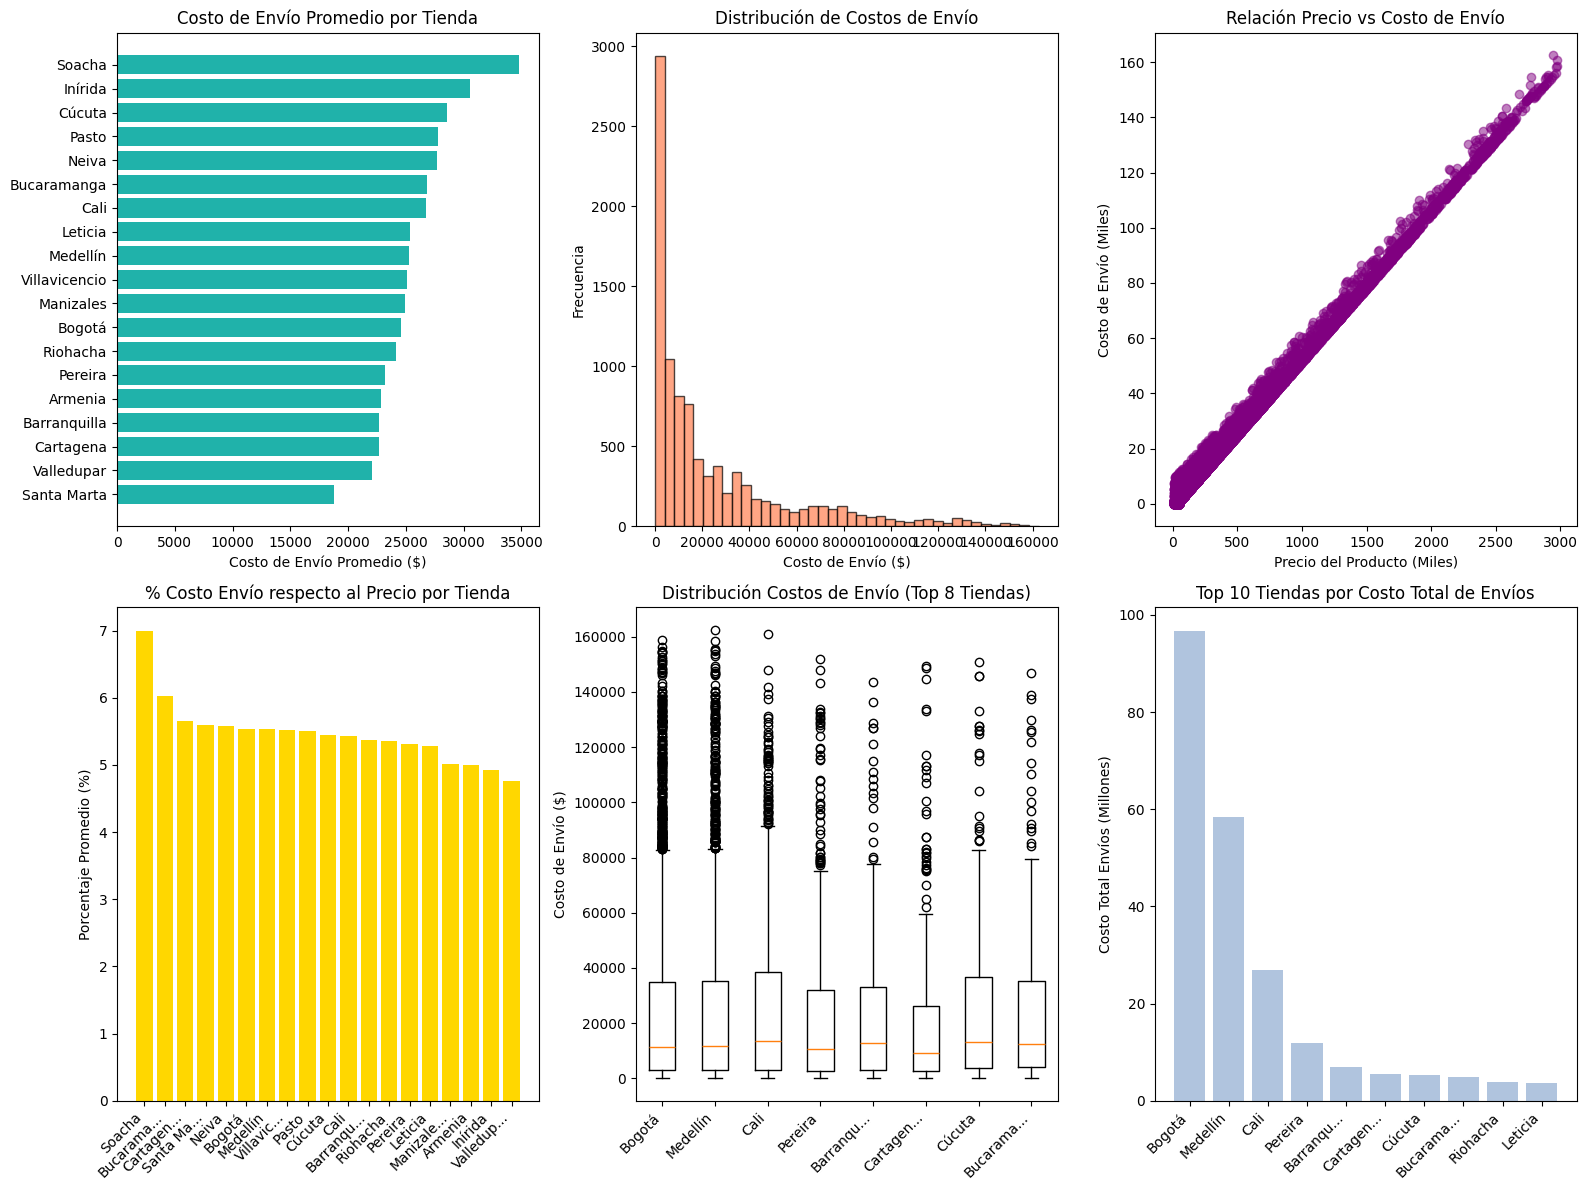


                        RESUMEN EJECUTIVO - ALURA STORE LATAM
📊 DATOS ANALIZADOS:
   • Total de registros: 9,435
   • Número de tiendas: 19
   • Número de productos únicos: 51
   • Número de categorías: 8

💰 FACTURACIÓN:
   • Facturación total: $4,403,619,200
   • Tienda con mayor facturación: Bogotá ($1,814,858,300)
   • Categoría más rentable: Electrónicos ($1,660,576,500)

⭐ CALIFICACIONES:
   • Calificación promedio general: 4.01/5.0
   • Tienda mejor calificada: Pasto (4.15/5.0)

📦 PRODUCTOS:
   • Producto más vendido: Mesa de noche (210 unidades)
   • Promedio de ventas por producto: 185 unidades

🚚 ENVÍOS:
   • Costo promedio de envío: $24,875.15
   • Costo total en envíos: $234,697,000
   • Tienda con envío más caro: Soacha ($34,768.42)
   • Tienda con envío más barato: Santa Marta ($18,752.32)


In [12]:
# Visualización de costos de envío
plt.figure(figsize=(16, 12))

# Costo de envío promedio por tienda
plt.subplot(2, 3, 1)
plt.barh(range(len(envios_por_tienda)), envios_por_tienda['Envío Promedio'], color='lightseagreen')
plt.yticks(range(len(envios_por_tienda)), envios_por_tienda.index)
plt.xlabel('Costo de Envío Promedio ($)')
plt.title('Costo de Envío Promedio por Tienda')
plt.gca().invert_yaxis()

# Distribución de costos de envío
plt.subplot(2, 3, 2)
plt.hist(todos_datos['Costo de envío'], bins=40, alpha=0.7, edgecolor='black', color='coral')
plt.xlabel('Costo de Envío ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Costos de Envío')

# Relación entre precio del producto y costo de envío
plt.subplot(2, 3, 3)
plt.scatter(todos_datos['Precio'] / 1000, todos_datos['Costo de envío'] / 1000, alpha=0.5, color='purple')
plt.xlabel('Precio del Producto (Miles)')
plt.ylabel('Costo de Envío (Miles)')
plt.title('Relación Precio vs Costo de Envío')

# Porcentaje de envío respecto al precio por tienda
plt.subplot(2, 3, 4)
porcentaje_por_tienda = todos_datos.groupby('Lugar de Compra')['Porcentaje_Envio'].mean().sort_values(ascending=False)
plt.bar(range(len(porcentaje_por_tienda)), porcentaje_por_tienda.values, color='gold')
plt.xticks(range(len(porcentaje_por_tienda)), [t[:8] + '...' if len(t) > 8 else t for t in porcentaje_por_tienda.index], rotation=45, ha='right')
plt.ylabel('Porcentaje Promedio (%)')
plt.title('% Costo Envío respecto al Precio por Tienda')

# Box plot de costos de envío por las principales tiendas
plt.subplot(2, 3, 5)
principales_tiendas = facturacion_por_tienda.head(8).index
datos_envio_principales = []
etiquetas_principales = []
for tienda in principales_tiendas:
    datos_tienda = todos_datos[todos_datos['Lugar de Compra'] == tienda]['Costo de envío']
    datos_envio_principales.append(datos_tienda)
    etiquetas_principales.append(tienda[:8] + '...' if len(tienda) > 8 else tienda)

plt.boxplot(datos_envio_principales, tick_labels=etiquetas_principales)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Costo de Envío ($)')
plt.title('Distribución Costos de Envío (Top 8 Tiendas)')

# Costo total de envíos por tienda
plt.subplot(2, 3, 6)
top_10_costo_total = envios_por_tienda.sort_values('Costo Total Envíos', ascending=False).head(10)
plt.bar(range(len(top_10_costo_total)), top_10_costo_total['Costo Total Envíos'] / 1e6, color='lightsteelblue')
plt.xticks(range(len(top_10_costo_total)), [t[:8] + '...' if len(t) > 8 else t for t in top_10_costo_total.index], rotation=45, ha='right')
plt.ylabel('Costo Total Envíos (Millones)')
plt.title('Top 10 Tiendas por Costo Total de Envíos')

plt.tight_layout()
plt.show()

# RESUMEN FINAL DEL ANÁLISIS
print("\n" + "="*80)
print("                        RESUMEN EJECUTIVO - ALURA STORE LATAM")
print("="*80)
print(f"📊 DATOS ANALIZADOS:")
print(f"   • Total de registros: {len(todos_datos):,}")
print(f"   • Número de tiendas: {todos_datos['Lugar de Compra'].nunique()}")
print(f"   • Número de productos únicos: {todos_datos['Producto'].nunique()}")
print(f"   • Número de categorías: {todos_datos['Categoría del Producto'].nunique()}")

print(f"\n💰 FACTURACIÓN:")
print(f"   • Facturación total: ${todos_datos['Precio'].sum():,.0f}")
print(f"   • Tienda con mayor facturación: {facturacion_por_tienda.index[0]} (${facturacion_por_tienda.iloc[0]['Facturación Total']:,.0f})")
print(f"   • Categoría más rentable: {ventas_por_categoria.index[0]} (${ventas_por_categoria.iloc[0]['Facturación Total']:,.0f})")

print(f"\n⭐ CALIFICACIONES:")
print(f"   • Calificación promedio general: {todos_datos['Calificación'].mean():.2f}/5.0")
print(f"   • Tienda mejor calificada: {calificaciones_tienda.index[0]} ({calificaciones_tienda.iloc[0]['Calificación Promedio']:.2f}/5.0)")

print(f"\n📦 PRODUCTOS:")
print(f"   • Producto más vendido: {productos_vendidos.index[0]} ({productos_vendidos.iloc[0]['Cantidad Vendida']:.0f} unidades)")
print(f"   • Promedio de ventas por producto: {productos_vendidos['Cantidad Vendida'].mean():.0f} unidades")

print(f"\n🚚 ENVÍOS:")
print(f"   • Costo promedio de envío: ${todos_datos['Costo de envío'].mean():,.2f}")
print(f"   • Costo total en envíos: ${todos_datos['Costo de envío'].sum():,.0f}")
print(f"   • Tienda con envío más caro: {envios_por_tienda.index[0]} (${envios_por_tienda.iloc[0]['Envío Promedio']:,.2f})")
print(f"   • Tienda con envío más barato: {envios_por_tienda.index[-1]} (${envios_por_tienda.iloc[-1]['Envío Promedio']:,.2f})")
print("="*80)